In [11]:
import pandas as pd

# Load the CSV (adjust path if needed)
file_path = "/kaggle/input/nse200/ind_nifty200list.csv"  
nse200 = pd.read_csv(file_path)

# Preview the columns
print("Columns:", nse200.columns.tolist())
nse200.head()


Columns: ['Company Name', 'Industry', 'Symbol', 'Series', 'ISIN Code']


,Company Name,Industry,Symbol,Series,ISIN Code
0,ABB India Ltd.,Capital Goods,ABB,EQ,INE117A01022
1,ACC Ltd.,Construction Materials,ACC,EQ,INE012A01025
2,APL Apollo Tubes Ltd.,Capital Goods,APLAPOLLO,EQ,INE702C01027
3,AU Small Finance Bank Ltd.,Financial Services,AUBANK,EQ,INE949L01017
4,Adani Energy Solutions Ltd.,Power,ADANIENSOL,EQ,INE931S01010


In [12]:
# Convert Symbol to yfinance format by appending '.NS'
nse200['Yahoo_Ticker'] = nse200['Symbol'].astype(str) + '.NS'

# Rename columns for clarity if needed
nse200 = nse200.rename(columns={
    'Company Name': 'Company',
    'Industry': 'Sector'
})

# Keep relevant columns
nse200_clean = nse200[['Yahoo_Ticker', 'Company', 'Sector']]

# Check unique sector distribution
sector_counts = nse200_clean['Sector'].value_counts()
print("Sector Distribution:\n", sector_counts)


Sector Distribution:
 Sector
Financial Services                47
Capital Goods                     20
Automobile and Auto Components    17
Healthcare                        14
Information Technology            13
Consumer Services                 12
Fast Moving Consumer Goods        12
Power                             11
Oil Gas & Consumable Fuels        11
Metals & Mining                   10
Consumer Durables                  6
Realty                             6
Construction Materials             5
Telecommunication                  5
Chemicals                          5
Services                           4
Construction                       3
Textiles                           1
Name: count, dtype: int64


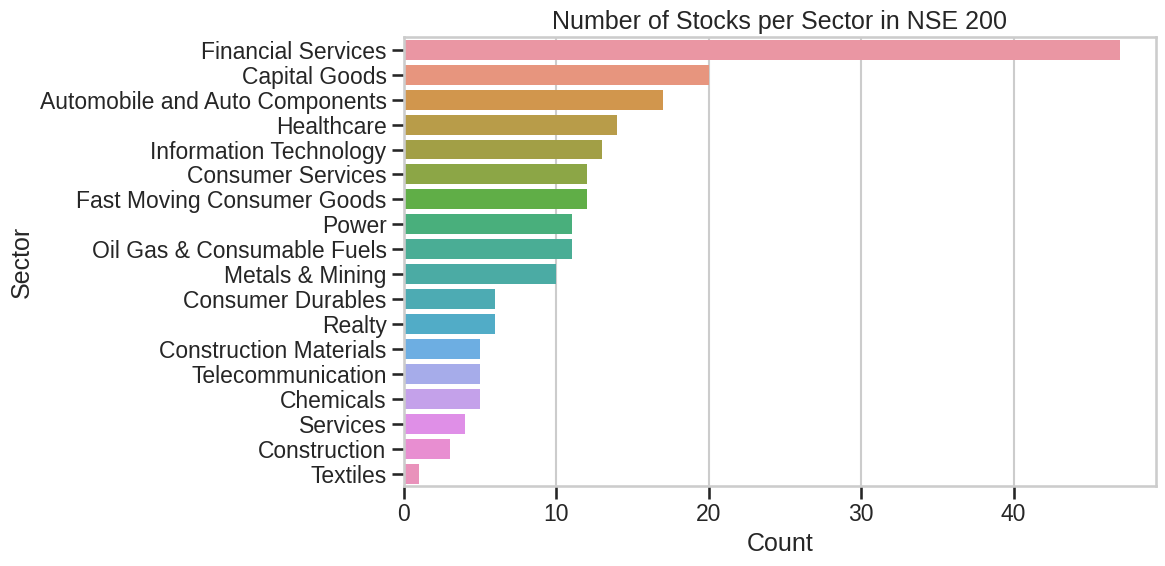

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=nse200_clean, y="Sector", order=sector_counts.index)
plt.title("Number of Stocks per Sector in NSE 200")
plt.xlabel("Count")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()


In [14]:
!pip install yfinance --quiet

⏳ Downloading 50 tickers...


[*********************100%***********************]  50 of 50 completed

✅ Valid tickers: 50


ValueError: ❌ No usable data returned. Try fewer tickers or check internet access.

In [16]:
# Count of stocks per sector (from IADI classification merged dataframe)
sector_counts = merged['Sector'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Sector Composition of NSE 200 Sample")
plt.axis('equal')
plt.show()


NameError: name 'merged' is not defined

In [17]:
print("Available tickers in returns:")
print(returns.columns.tolist())



Available tickers in returns:
['ABB.NS', 'ABCAPITAL.NS', 'ABFRL.NS', 'ABLBL.NS', 'ACC.NS', 'ADANIENSOL.NS', 'ADANIENT.NS', 'ADANIGREEN.NS', 'ADANIPORTS.NS', 'ADANIPOWER.NS', 'ALKEM.NS', 'AMBUJACEM.NS', 'APLAPOLLO.NS', 'APOLLOHOSP.NS', 'APOLLOTYRE.NS', 'ASHOKLEY.NS', 'ASIANPAINT.NS', 'ASTRAL.NS', 'ATGL.NS', 'AUBANK.NS', 'AUROPHARMA.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJAJFINSV.NS', 'BAJAJHFL.NS', 'BAJAJHLDNG.NS', 'BAJFINANCE.NS', 'BANDHANBNK.NS', 'BANKBARODA.NS', 'BANKINDIA.NS', 'BDL.NS', 'BEL.NS', 'BHARATFORG.NS', 'BHARTIARTL.NS', 'BHARTIHEXA.NS', 'BHEL.NS', 'BIOCON.NS', 'BOSCHLTD.NS', 'BPCL.NS', 'BRITANNIA.NS', 'BSE.NS', 'CANBK.NS', 'CGPOWER.NS', 'CHOLAFIN.NS', 'CIPLA.NS', 'COALINDIA.NS', 'COCHINSHIP.NS', 'COFORGE.NS', 'DMART.NS', 'MAHABANK.NS']


Using example stock for rolling volatility: ABB.NS


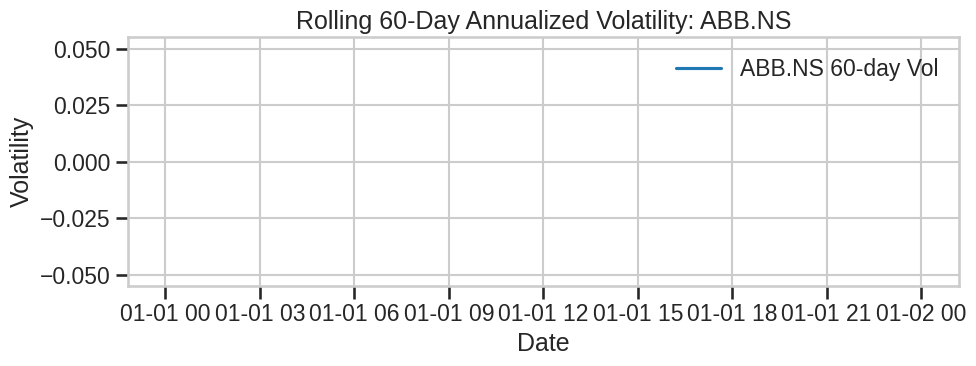

In [18]:
sample_ticker = returns.columns[0]
print("Using example stock for rolling volatility:", sample_ticker)

rolling_vol = returns[sample_ticker].rolling(window=60).std() * np.sqrt(252)

plt.figure(figsize=(10, 4))
plt.plot(rolling_vol, label=f"{sample_ticker} 60-day Vol")
plt.title(f"Rolling 60-Day Annualized Volatility: {sample_ticker}")
plt.ylabel("Volatility")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Index(['ABB.NS', 'ABCAPITAL.NS', 'ABFRL.NS', 'ABLBL.NS', 'ACC.NS'], dtype='object', name='Ticker')


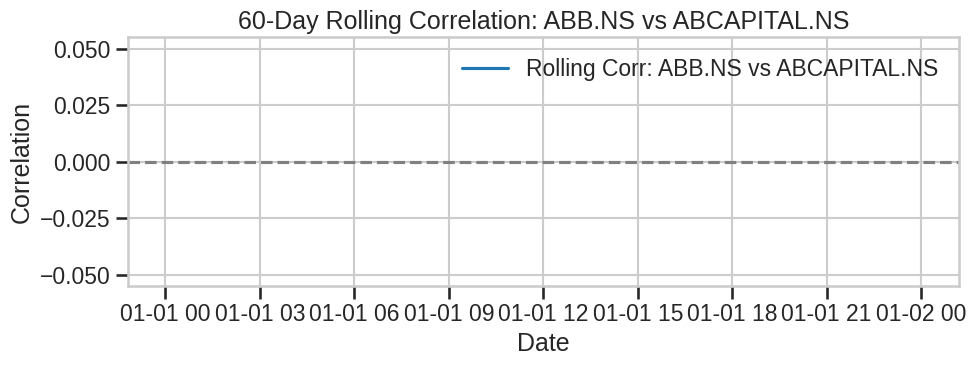

In [20]:
print(returns.columns[:5])  # Pick two from this list

ticker1 = returns.columns[0]
ticker2 = returns.columns[1]

rolling_corr = returns[ticker1].rolling(60).corr(returns[ticker2])

plt.figure(figsize=(10, 4))
plt.plot(rolling_corr, label=f"Rolling Corr: {ticker1} vs {ticker2}")
plt.axhline(0, linestyle='--', color='gray')
plt.title(f"60-Day Rolling Correlation: {ticker1} vs {ticker2}")
plt.ylabel("Correlation")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
# Boxplot: Volatility and Momentum grouped by IADI Profile
plt.figure(figsize=(12, 5))
sns.boxplot(data=merged, x='IADI_Profile', y='Volatility', palette='coolwarm')
plt.title("Volatility Distribution by IADI Profile")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=merged, x='IADI_Profile', y='Momentum_6M', palette='viridis')
plt.title("Momentum (6M) Distribution by IADI Profile")
plt.show()


NameError: name 'merged' is not defined

<Figure size 1200x500 with 0 Axes>

In [24]:
sector_momentum = merged.groupby('Sector')['Momentum_6M'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.heatmap(sector_momentum.to_frame().T, cmap="YlGnBu", annot=True, cbar_kws={'label': 'Avg Momentum'})
plt.title("Average 6M Momentum by Sector")
plt.yticks([])  # hide row label
plt.tight_layout()
plt.show()


NameError: name 'merged' is not defined

In [25]:
# STEP 1: Export IADI profile–based stock lists
a1_df = merged[merged['IADI_Profile'] == 'A1']
b2_df = merged[merged['IADI_Profile'] == 'B2']
c3_df = merged[merged['IADI_Profile'] == 'C3']

# Save to disk
a1_df.to_csv("/kaggle/working/IADI_A1.csv", index=False)
b2_df.to_csv("/kaggle/working/IADI_B2.csv", index=False)
c3_df.to_csv("/kaggle/working/IADI_C3.csv", index=False)

print("✅ Exported profile CSVs: IADI_A1.csv, IADI_B2.csv, IADI_C3.csv")



NameError: name 'merged' is not defined

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# STEP 2: Simulate macro indicator data (2021–2024 quarterly)
dates = pd.date_range("2021-01-01", "2024-01-01", freq="Q")
np.random.seed(42)

macro_df = pd.DataFrame({
    "Date": dates,
    "India_VIX": np.random.normal(16, 3, len(dates)),        # simulate VIX between 12–20
    "Repo_Rate": np.random.normal(5.5, 0.75, len(dates)),    # simulate repo rate
    "CPI_YoY": np.random.normal(5.8, 0.5, len(dates)),       # simulate CPI YoY%
})

# STEP 3: Regime logic (simplified)
def classify_regime(row):
    if row["India_VIX"] > 18 and row["CPI_YoY"] > 6:
        return "Volatile"
    elif row["India_VIX"] < 15 and row["CPI_YoY"] < 5.5:
        return "Growth"
    else:
        return "Disinflation"

macro_df["Regime"] = macro_df.apply(classify_regime, axis=1)
macro_df.set_index("Date", inplace=True)

# Show sample
macro_df.head()


/tmp/ipykernel_35/289006965.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range("2021-01-01", "2024-01-01", freq="Q")


,India_VIX,Repo_Rate,CPI_YoY,Regime
Date,,,,
2021-03-31,17.490142,5.681472,5.527809,Disinflation
2021-06-30,15.585207,4.065040,5.855461,Disinflation
2021-09-30,17.943066,4.206312,5.224503,Disinflation
2021-12-31,20.569090,5.078284,5.987849,Disinflation
2022-03-31,15.297540,4.740377,5.499681,Disinflation


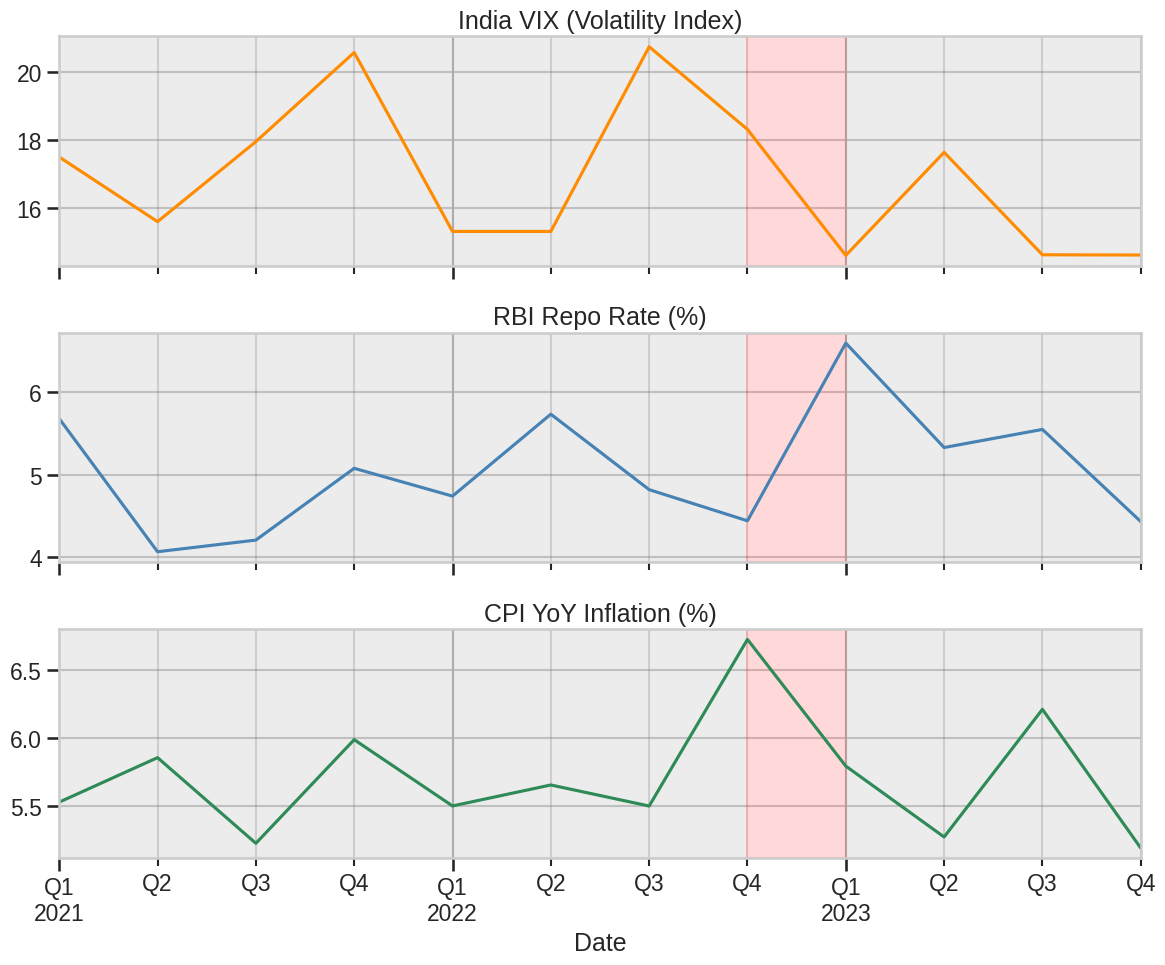

In [27]:
# STEP 4: Visualize each indicator with regime color

fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

macro_df["India_VIX"].plot(ax=axs[0], color='darkorange')
axs[0].set_title("India VIX (Volatility Index)")

macro_df["Repo_Rate"].plot(ax=axs[1], color='steelblue')
axs[1].set_title("RBI Repo Rate (%)")

macro_df["CPI_YoY"].plot(ax=axs[2], color='seagreen')
axs[2].set_title("CPI YoY Inflation (%)")

for ax in axs:
    for i, (date, row) in enumerate(macro_df.iterrows()):
        ax.axvspan(date, date + pd.Timedelta(days=90),
                   color={"Volatile": "red", "Growth": "green", "Disinflation": "gray"}[row["Regime"]],
                   alpha=0.15)

plt.tight_layout()
plt.show()


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = returns.corr()


ValueError: The condensed distance matrix must contain only finite values.

<Figure size 1200x1000 with 0 Axes>

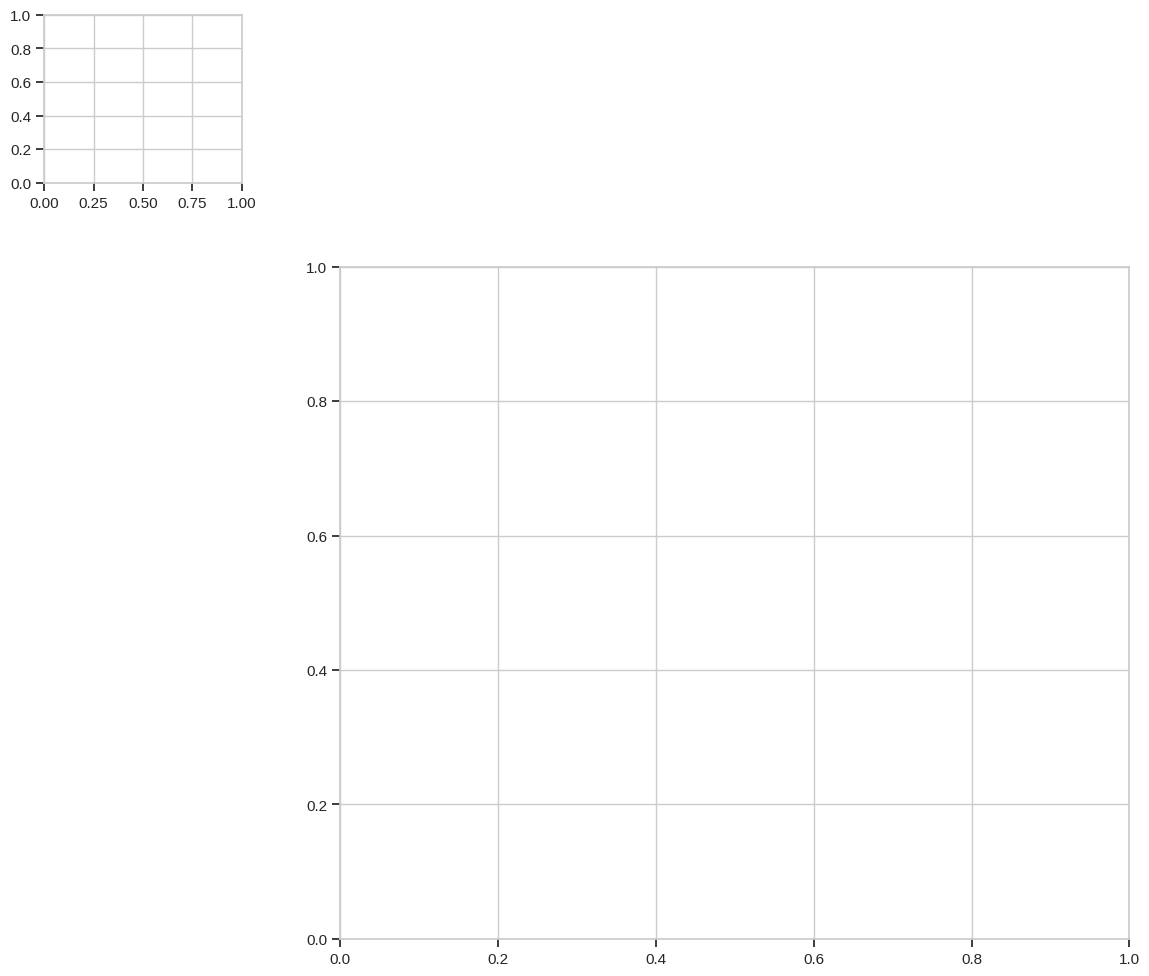

In [29]:
# Create a clustermap using seaborn
sns.set_context("notebook")
plt.figure(figsize=(12, 10))

clustermap = sns.clustermap(
    corr_matrix,
    method='ward',        # linkage method
    metric='euclidean',   # distance metric
    cmap='coolwarm',
    linewidths=0.5,
    figsize=(14, 12),
    annot=True
)

plt.suptitle("Hierarchical Clustering of Stocks Based on Return Correlation", y=1.02)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Load stock tickers for each IADI profile
a1_tickers = pd.read_csv("/kaggle/working/IADI_A1.csv")["Ticker"].dropna().unique().tolist()
b2_tickers = pd.read_csv("/kaggle/working/IADI_B2.csv")["Ticker"].dropna().unique().tolist()
c3_tickers = pd.read_csv("/kaggle/working/IADI_C3.csv")["Ticker"].dropna().unique().tolist()

# Define function to fetch prices
def get_price_data(ticker_list):
    data = yf.download(ticker_list, start="2021-01-01", end="2024-01-01", auto_adjust=True)['Close']
    return data.dropna(axis=1, thresh=int(len(data) * 0.75))  # remove tickers with >25% missing
